In [111]:
from collections import Counter
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Analyze Results

In [112]:
sim_files = glob.glob(pathname="simulation_results/simulation*.csv")
n_sims = len(sim_files)
simulation_results = np.empty((n_sims, 20), dtype=object)

for i, file in enumerate(sim_files):
    record = pd.read_csv(file)
    placements = pd.Series(record['Result'])
    simulation_results[i] = placements.to_numpy()

In [113]:
# Two-dimensional numpy array of simulation results 
# with each row as a simulation, each column as country, entry as placement 
# team index is same as in teams_list, starting with India as 0

with open('teams.txt') as file:
    teams_list = file.read().splitlines()

# Ex: Print results for all countries
for i in range(0,20):
    print(teams_list[i], "results:", dict(Counter(simulation_results[:,i])))

India results: {'Champion': 9, 'Finalist': 1}
Pakistan results: {'Super 8 stage': 10}
Ireland results: {'Group stage': 10}
Canada results: {'Group stage': 10}
United States of America results: {'Group stage': 10}
England results: {'Finalist': 6, 'Semifinalist': 3, 'Champion': 1}
Australia results: {'Super 8 stage': 6, 'Semifinalist': 3, 'Finalist': 1}
Namibia results: {'Group stage': 10}
Scotland results: {'Group stage': 10}
Oman results: {'Group stage': 10}
New Zealand results: {'Semifinalist': 4, 'Super 8 stage': 4, 'Finalist': 2}
West Indies results: {'Semifinalist': 10}
Afghanistan results: {'Group stage': 10}
Uganda results: {'Group stage': 10}
Papua New Guinea results: {'Group stage': 10}
South Africa results: {'Super 8 stage': 10}
Sri Lanka results: {'Super 8 stage': 2, 'Group stage': 8}
Bangladesh results: {'Group stage': 2, 'Super 8 stage': 8}
Netherlands results: {'Group stage': 10}
Nepal results: {'Group stage': 10}


In [114]:
# match_records contains all match results from the simulation set.
# This way, we can easily calculate the proportion of matches won
# by one team versus another across the whole simulation set.
# The outcome column is included only in the rare case a tie occurs.
# Below, the match records from the first simulation are printed.
match_records = pd.read_csv('simulation_results/match_records.csv')
match_records[['winner','loser','outcome']].head(55)

,winner,loser,outcome
0,India,Pakistan,w
1,India,Ireland,w
2,India,Canada,w
3,India,United States of America,w
4,Pakistan,Ireland,w
5,Pakistan,Canada,w
6,Pakistan,United States of America,w
7,Ireland,Canada,w
8,Ireland,United States of America,w
9,United States of America,Canada,w


In [115]:
def result_bar(team):
    data = dict(Counter(simulation_results[:, teams_list.index(team)]))
    plt.figure(figsize=(10, 6))
    plt.bar(list(data.keys()), list(data.values()))
    plt.xlabel('Placement')
    plt.ylabel('Number of Simulations')
    plt.title(f'Simulation Results for {team}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [116]:
def result_pie(team):
    data = dict(Counter(simulation_results[:, teams_list.index(team)]))
    plt.figure(figsize=(8, 8))
    plt.pie(list(data.values()), labels=list(data.keys()), autopct='%1.1f%%', startangle=140)
    # plt.legend(loc="best", fontsize='medium', title="Placement")
    plt.title(f'Simulation Results for {team}')
    plt.axis('equal')
    plt.show()

In [117]:
def pair_results(teamA, teamB, print_statement=True):
    if teamA == teamB:
        return
    num_victories = len(match_records.loc[(match_records['winner'] == teamA) &
                                           (match_records['loser'] == teamB) &
                                           (match_records['outcome'] == 'w')])
    num_total = len(match_records.loc[((match_records['winner'] == teamA) &
                                           (match_records['loser'] == teamB)) |
                                           ((match_records['loser'] == teamA) &
                                           (match_records['winner'] == teamB))])
    if num_total == 0:
        if print_statement:
            print(f"{teamA} did not play {teamB} in this simulation set.")
    else:
        prop = num_victories/num_total
        if print_statement:
            print(f"{teamA} beat {teamB} {num_victories} times in {num_total} matches, for a winning proportion of {prop:.3f}.")
        return prop

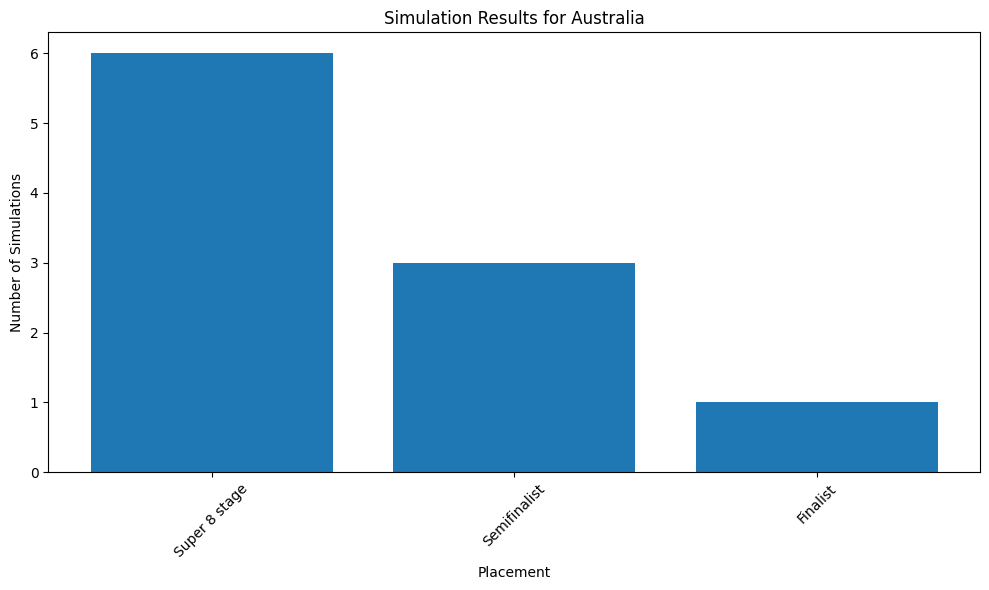

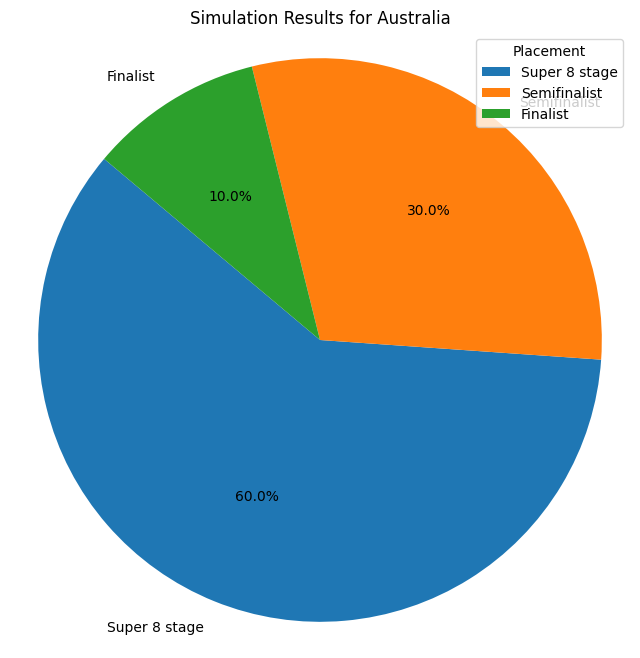

In [118]:
# Get bar chart / pie chart for any team here!
team = 'Australia'  # Example
result_bar(team)
result_pie(team)

In [119]:
# Get proportion of matches teamA won vs teamB
teamA = 'England'
teamB = 'Australia'
_ = pair_results(teamA, teamB)

England beat Australia 8 times in 14 matches, for a winning proportion of 0.571.


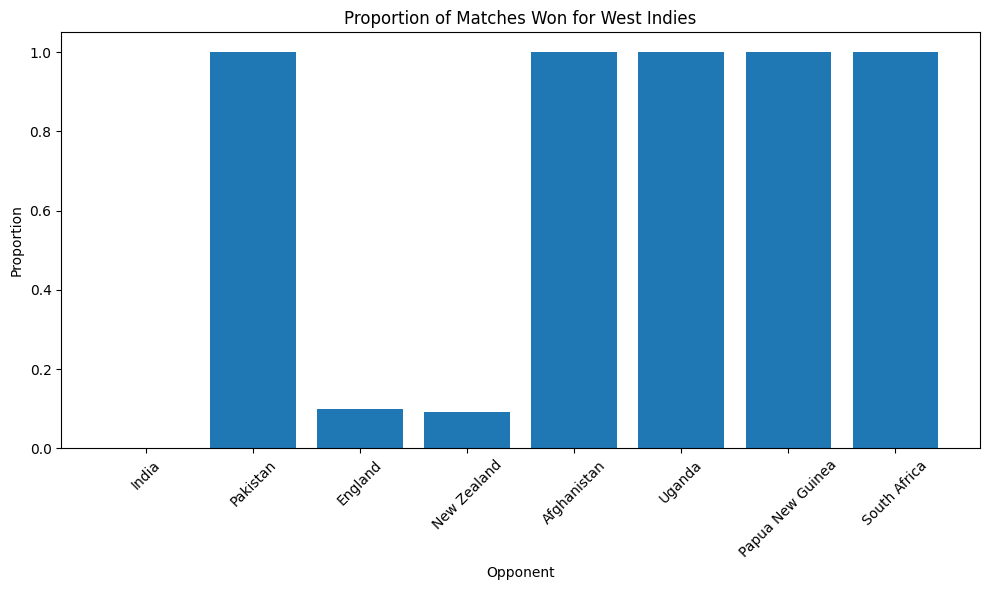

In [120]:
# Get proportion of matches teamA won vs all teams, and visualize
teamA = 'West Indies'

prop_dict = dict()
for teamB in teams_list:
    prop = pair_results(teamA, teamB, False)
    if prop is not None:
        prop_dict[teamB] = prop

plt.figure(figsize=(10, 6))
plt.bar(list(prop_dict.keys()), list(prop_dict.values()))
plt.xlabel('Opponent')
plt.ylabel('Proportion')
plt.title(f'Proportion of Matches Won for {teamA}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [121]:
# Idea: visualizations for total runs scored and total runs conceded
# For a specific team across the simulation set

def plot_runs(team):
    runs_statistics = np.empty((n_sims, 2), dtype=float)
    for i, file in enumerate(sim_files):
        record = pd.read_csv(file)
        runs_statistics[i,0] = record.loc[record['Country'] == team, 'total_runs_scored'].values[0]
        runs_statistics[i,1] = record.loc[record['Country'] == team, 'total_runs_conceded'].values[0]

    # Create density plots
    sns.kdeplot(runs_statistics[:,0], fill=True)
    plt.xlabel('Runs Scored')
    plt.ylabel('Density')
    plt.title(f'Scored Runs for {team}')
    plt.show()

    sns.kdeplot(runs_statistics[:,1], fill=True)
    plt.xlabel('Runs Conceded')
    plt.ylabel('Density')
    plt.title(f'Conceded Runs for {team}')
    plt.show()

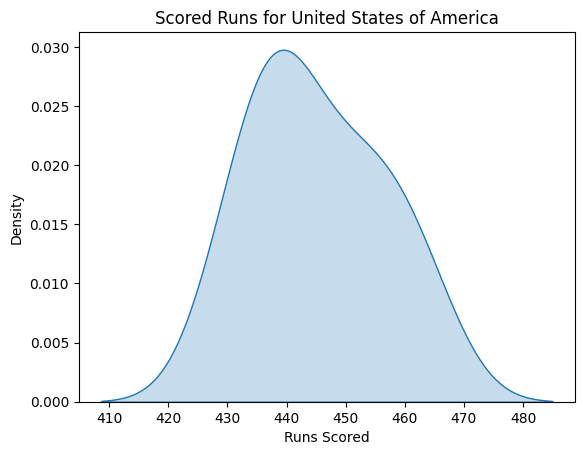

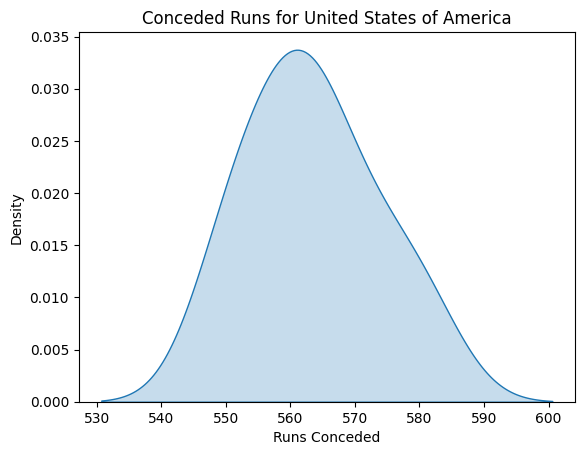

In [122]:
team_to_plot = 'United States of America'
plot_runs(team_to_plot)